In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import glob
from astropy.time import Time
import os
import fnmatch
%matplotlib inline

In [5]:
def getMCSprofiles(filename):
    '''Function to select specific text data from the MCS orbiter and convert it into an array
    Input:
    filename = the location of the file
    Output:
    x: data converted to data frames'''
    # The header contains column names and description
    header_string = ' ### Retrieved profiles:'
    header_lines = 4
    # Open the file for reading
    f = open(filename)
    lines = f.readlines()
    # Strip newline character from each line
    lines = [line.replace("\n","") for line in lines]
    # Read through all lines to find header string
    nlines = len(lines)
    i = 0
    for line in lines:
        i += 1
        if re.match(header_string, line):
            idx = i + header_lines-1
    # Extract only the lines containing profile data
    data = lines[idx:nlines-1]
    # Convert to floats
    nrows = len(data)-1
    y = np.array(data[0].split(), dtype=np.float)
    ncols = len(y)
    x = np.array([])
    for j in np.arange(0,nrows):
        x = np.append(x, np.array(data[j].split(), dtype=np.float))
    x = np.reshape(x, [nrows,ncols])
    columns = ['Pressure', 'Temperature', 'Temp_Err',
        'Dust','Dust_Err', 'H2Oice','H2Oice_Err', 'H2Ovap', 'H2Ovap_Err', 'CO2ice', 'CO2ice_Err', 'Altitude', 'Latitude', 'Longitude'  ]
    values = x
    df = pd.DataFrame(x,columns=columns)
    return df

In [6]:
def getMCSdata(filename, data_string):
    '''Function to select specific text data from the MCS orbiter and convert it into an array
    Input:
    filename = the location of the file
    data_string = specific data to be looked at
    Output:
    x: data converted to floats'''
    # The header contains column names and description
    header_string = ' ### Header data:'
    header_lines = 1
    foot_string = ' ### RMS data:'
    # Open the file for reading
    f = open(filename)
    lines = f.readlines()
    # Strip newline character from each line
    lines = [line.replace("\n","") for line in lines]
    foot_lines = lines.index(foot_string)
    nlines = len(lines)
    i = 0
    # Restrict the text to only the data needed
    for line in lines:
        i += 1
        if re.match(header_string, line):
            idx = i + header_lines - 1 
        if re.match(foot_string, line):
            idy = foot_lines - nlines
    #store data into a list
    data = lines[idx:idy]
    #get rid of leading whitespaces
    x =[]
    for i in data:
        x.append(i.lstrip())
    #get rid of trailing whitespaces
    y = []
    for i in x:
        y.append(i.rstrip())
    #split the data into two columns
    z =[]
    for i in y:
        z.append(i.split('='))
    #convert data to arrays
    col1 = np.array(z)
    #create column of strings
    a = col1[:,0]
    #convert array to list
    b = a.tolist()
    #strip column of strings of whitespaces
    c=[]
    for i in b:
        c.append(i.strip())
    #index for the matching data_string
    colindex = c.index(data_string)
    #create column of floats
    d = col1[:,1]
    #convert array to list
    e = d.tolist()
    #convert list of strings to floats
    f = [float(i) for i in e]
    #find the float matching data_string index
    result = f[colindex]
    return result

In [7]:
def getAllMCSdata(data_string):
    '''Function that uses the getMCSdata function to retrieve specific data from multiple data files
    Input:
    data_string = specific data to be looked at
    Output:
    x: a list of data converted to floats corresponding to the data files '''
    path = '../WORK/MCS_atm/060924160000/mcs_ret_v*.out'
    files = sorted(glob.glob(path))
    x = []
    for filename in files:
        x.append(getMCSdata(filename, data_string))
    return x    

In [8]:
def getAllMCSprofiles():
    '''Function that compiles all text files from MCS into a single list bys using the getMCSprofiles function
    Input:
    None
    Output:
    x = list containing all the text files retrieved from the MCS'''
    path = '../WORK/MCS_atm/060924160000/mcs_ret_v*.out'
    files = sorted(glob.glob(path))
    x = []
    for filename in files:
        x.append(getMCSprofiles(filename))
    return x  

In [9]:
def getMCSSum(parameter):
    '''Function that uses the getAllMCSprofiles and getMCSprofiles functions to obtain specific column data 
    from each text file and sum it into a single float. The function returns a list of floats that  depends on 
    the amount of text files.
    Input:
    parameter = string that matches a column from a text file
    Output:
    y = list of floats corresponding to the specific string from the data frame generated by the getMCSprofile function'''
    DFlist = getAllMCSprofiles()
    x = []
    for i in range(len(DFlist)):
         x.append(getAllMCSprofiles()[i][parameter])
    x = np.array(x)
    y = []
    for j in x:
        y.append(sum(j[j != -9999.000]))
    return y

In [10]:
x = (getMCSSum('H2Oice'))
x

[0.014792426190000001,
 0.016548558169799998,
 0.018033723198699999,
 0.013210605099800002,
 0.0096653993029999965,
 0.017368455884,
 0.0151010942,
 0.02033367593,
 0.016671186873000007,
 0.004933923902499999,
 0.0015368745339999997,
 0.0037026262295999997,
 0.0015448234191,
 0.0034857430999999999,
 0.0034187619909000003,
 0.0021866888973999981,
 0.0024803356008999983,
 0.0048405813439000005,
 0.0041222473000000004,
 0.0041058662085000103,
 0.0037063199999999999,
 0.0056124360000000002,
 0.0028815793000000005,
 0.0022112130000000001,
 0.0027012560000000008,
 0.0027397239999999998,
 0.0061483817900000008,
 0.0086229939999999984,
 0.011126474999999999,
 0.028011373717099993,
 0.02299417619,
 0.00031531717460000033,
 0.00141979,
 0.001297229,
 0.010432056000000002,
 0.030516454199999994,
 0.005402312317100001,
 0.0058122630000000007,
 0.013032751999999998,
 0.014634409999999999,
 0.0069401200000000001,
 0.0038628485000000005,
 0.00046909149000000003,
 0.0049812334999999996,
 0.00399152320

In [11]:
t0=time.time()
ayou = getAllMCSdata('Scene latitude')
t1=time.time()
print t1-t0
print ayou
len(ayou)

0.47310590744
[-21.94271, -23.8099, -25.57091, -27.44328, -29.21828, -31.09347, -32.97146, -34.75265, -36.63325, -38.51483, -42.4078, -44.29378, -46.14918, -47.98916, -49.86435, -51.75473, -53.64571, -55.53529, -57.32606, -59.21523, -61.10482, -62.99298, -64.87933, -66.76649, -68.65025, -70.5322, -72.31354, -74.18385, -78.10542, -80.78085, -86.42159, -84.02168, -77.58208, -68.28548, -61.44781, -54.71489, -41.81161, -39.93783, 9.42276, 11.28556, 13.14915, 15.09154, 16.95394, 18.79793, 20.73813, 22.56412, 24.49911, 26.3481, 28.19549, 30.14088, 31.99187, 33.94446, 35.80525, 39.70022, 41.70681, 45.80159, 47.66857, 49.52015, 51.47334, 53.32752, 55.27729, 57.12748, 59.07626, 60.92164, 62.87499, 65.58195, 66.12354, 66.66452, 67.20412, 69.24486, 71.17142, 72.99435, 74.81106, 76.71275, 80.4775, 82.2951, 83.94816, 85.45136, 86.64532, 86.74292, 82.03218, 75.63224, 69.71506, 60.57405, 54.61351, 48.11258, 42.14842, 36.27906, 34.46646, 32.75307, 30.93768, 27.1925, 25.3747, 23.65592, 21.83612, 20.113

198

In [15]:
t0=time.time()
a = getMCSdata('../WORK/mcs_ret_v4.3.11.00001.out','H2Oice_843_nad_od')
t1=time.time()
print t1-t0
print a

0.00579690933228
0.0034


In [16]:
t0=time.time()
DF = getMCSprofiles('mcs_ret_v4.3.11.00001.out')
t1=time.time()
print t1-t0
e = DF[16:73]
print e

0.00514101982117
      Pressure  Temperature  Temp_Err          Dust     Dust_Err  \
16  254.285800      166.367     0.730 -9.999000e+03 -9999.000000   
17  224.406500      167.106     0.532  2.411100e-07     0.000003   
18  198.038000      168.412     0.527  9.749200e-08     0.000001   
19  174.767900      170.159     0.655  1.547400e-08     0.000001   
20  154.232100      171.874     0.656  1.332500e-09     0.000001   
21  136.109400      173.075     0.623  1.000000e-09     0.000001   
22  120.116100      173.542     0.646  1.000000e-09     0.000001   
23  106.002100      173.395     0.605  1.000000e-09     0.000001   
24   93.546530      172.883     0.332  1.000000e-09     0.000001   
25   82.554520      172.217     0.232 -9.999000e+03 -9999.000000   
26   72.854110      171.515     0.220 -9.999000e+03 -9999.000000   
27   64.293530      170.787     0.267 -9.999000e+03 -9999.000000   
28   56.738840      169.896     0.309 -9.999000e+03 -9999.000000   
29   50.071850      168.679    

In [17]:
useful = DF.loc[13:91]

In [18]:
t = np.array(useful['Temperature'])
a = np.array(useful['Altitude'])
p = np.array(useful['Pressure'])

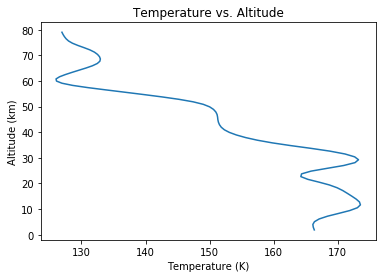

In [19]:
plt.plot(t, a)
plt.title('Temperature vs. Altitude')
plt.xlabel('Temperature (K)')
plt.ylabel('Altitude (km)')
plt.show()

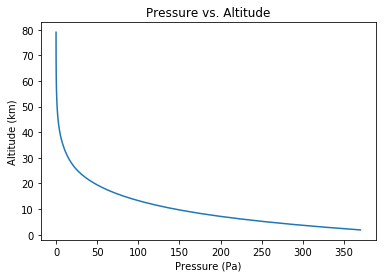

In [20]:
plt.plot(p, a)
plt.title('Pressure vs. Altitude')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Altitude (km)')
plt.show()

In [21]:
def datetoMY(string):
        x = string[0]+string[1]
        year =  '20{}'.format(x)
        month = string[2]+string[3]
        day = string[4]+string[5]
        hour = string[6]+string[7]
        minute = string[8]+string[9]
        y = string[10]+string[11]
        second = '{}.000'.format(y)
        date = '{}-{}-{} {}:{}:{}'.format(year,month,day,hour,minute,second)
        time = Time(date, scale='utc')
        time = time.jd
        if 2453757.2 <= time < 2454444.2:
            return 'MY28'
        elif 2454444.2 <= time < 2455131.1:
            return 'MY29'
        elif 2455131.1 <= time < 2455818.1:
            return 'MY30'
        elif 2455818.1 <= time < 2456505.1:
            return 'MY31'
        elif 2456505.1 <= time < 2457192.0:
            return 'MY32'
        elif 2457192.0 <= time < 2457879.0:
            return 'MY33' 
        elif 2457879.0 <= time < 2458566.0:
            return 'MY34'

In [22]:
def MYtodate(MY):
    if MY == '28':
        x = np.linspace(2453757.2,2454444.19999999)
    elif MY == '29':
        x = np.linspace(2454444.2,2455131.09999999)
    elif MY == '30':
        x = np.linspace(2455131.1,2455818.09999999)
    elif MY == '31':
        x = np.linspace(2455818.1,2456505.09999999)
    elif MY == '32':
        x = np.linspace(2456505.1,2457191.99999999)
    elif MY == '33':
        x = np.linspace(2457192.0,2457878.99999999)
    elif MY == '34':
        x = np.linspace(2457879.0,2458565.99999999)
    y = Time(x, format='jd')
    y = y.iso
    y_i = y[0]
    y_f = y[-1]
    z_i = y_i[2]+y_i[3]+y_i[5]+y_i[6]+y_i[8]+y_i[9]+y_i[11]+y_i[12]+'0000'
    z_f = y_f[2]+y_f[3]+y_f[5]+y_f[6]+y_f[8]+y_f[9]+y_f[11]+y_f[12]+'0000'
    return (z_i),(z_f)

In [71]:
a = MYtodate('28')
a

('060121160000', '071209160000')

In [153]:
def openFiles(MY):
    path = '../WORK/MCS_atm/'
    a = MYtodate(MY)
    files1 = sorted(glob.glob(path+'{}/*'.format(a[0])))
    files2 = sorted(glob.glob(path+'{}/*'.format(a[-1])))
    allfiles = (files1,files2)
    return allfiles

In [154]:
openFiles('28')

([], [])